<a href="https://colab.research.google.com/github/Devulapally-hansika/word2vec/blob/main/Copy_of_p%2Bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving word2vec.txt to word2vec (1).txt


In [ ]:
with open('word2vec.txt', 'r') as file:
    word2vec = file.readlines()


print(word2vec)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man\n']


In [ ]:
for i in range(len(word2vec)):
    word2vec[i] = word2vec[i].lower().replace('\n', '')

print(word2vec)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [ ]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in word2vec:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [ ]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])

In [ ]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [ ]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]
print(word_embeddings)

{'beautiful': array([-0.8645795,  0.643513 ], dtype=float32), 'boy': array([-0.91710955, -0.7582309 ], dtype=float32), 'daughter': array([-1.4370902,  1.383243 ], dtype=float32), 'future': array([-0.12635818, -1.1446846 ], dtype=float32), 'king': array([-0.38752833, -1.3775138 ], dtype=float32), 'man': array([ 0.6096541, -1.4302877], dtype=float32), 'prince': array([ 1.2496881, -1.1890332], dtype=float32), 'princess': array([0.92423475, 1.6733329 ], dtype=float32), 'queen': array([-1.1252286,  1.0161192], dtype=float32), 'son': array([-0.79749954, -0.8025803 ], dtype=float32), 'strong': array([-0.8561049, -0.8833067], dtype=float32), 'woman': array([-0.2446829,  1.1290656], dtype=float32)}


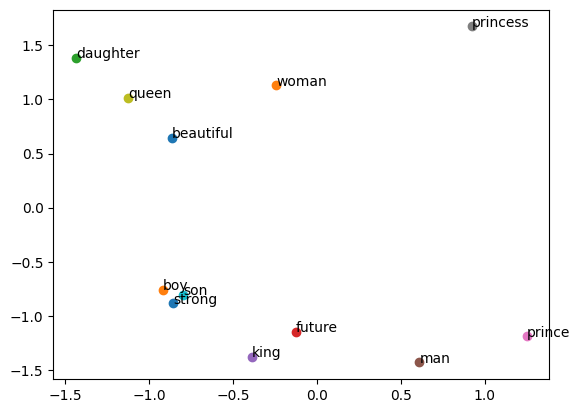

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Layer


In [ ]:

X = np.eye(10)

In [ ]:
def positional_encoding(length, d_model):
    pos = np.arange(length)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(angle_rads, dtype=tf.float32)

X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
X_with_pos = X_tensor + positional_encoding(X_tensor.shape[0], X_tensor.shape[1])


In [ ]:
class MultiHeadSelfAttention(Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0

        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.Wq = Dense(d_model)
        self.Wk = Dense(d_model)
        self.Wv = Dense(d_model)
        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, x):
        batch_size = tf.shape(x)[0]
        Q = self.split_heads(self.Wq(x), batch_size)
        K = self.split_heads(self.Wk(x), batch_size)
        V = self.split_heads(self.Wv(x), batch_size)

        score = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(tf.cast(self.depth, tf.float32))
        weights = tf.nn.softmax(score, axis=-1)
        output = tf.matmul(weights, V)

        output = tf.transpose(output, perm=[0, 2, 1, 3])
        concat = tf.reshape(output, (batch_size, -1, self.num_heads * self.depth))

        return self.dense(concat)


In [ ]:
X_batch = tf.expand_dims(X_with_pos, 0)

mha = MultiHeadSelfAttention(d_model=X.shape[1], num_heads=2)
attention_output = mha(X_batch)

attention_output = tf.squeeze(attention_output).numpy()
print("Output shape:", attention_output.shape)


Output shape: (10, 10)


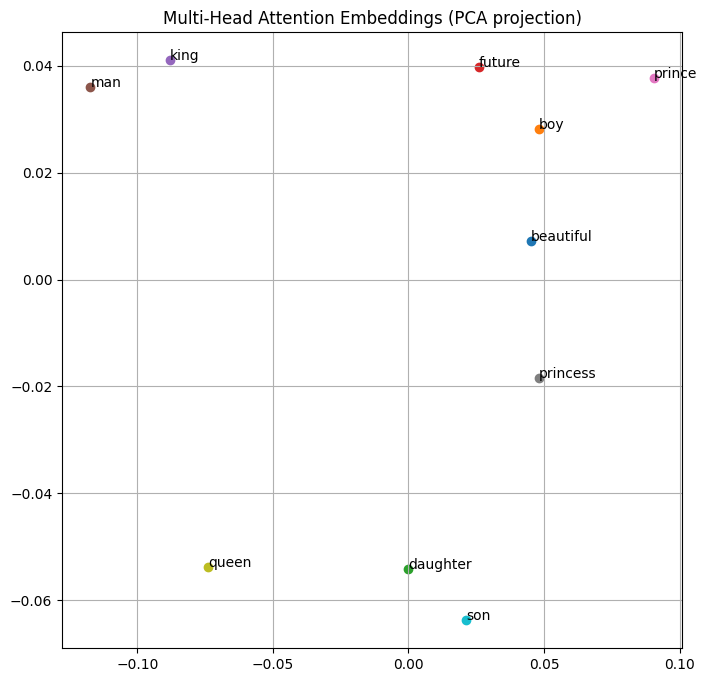

In [ ]:
num_points = min(len(all_words), reduced.shape[0])

plt.figure(figsize=(8, 8))
for i in range(num_points):
    x, y = reduced[i]
    word = all_words[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=10)

plt.title("Multi-Head Attention Embeddings (PCA projection)")
plt.grid(True)
plt.show()
